# Hierarchical Clustering (Universities Data)

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

In [2]:
df= pd.read_csv("Universities.csv")

In [3]:
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   SAT       25 non-null     int64 
 2   Top10     25 non-null     int64 
 3   Accept    25 non-null     int64 
 4   SFRatio   25 non-null     int64 
 5   Expenses  25 non-null     int64 
 6   GradRate  25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [5]:
df.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [7]:
df["Univ"].nunique()

25

In [8]:
# We can Drop "Univ":

df = df.drop("Univ", axis= 1)

In [9]:
df.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90


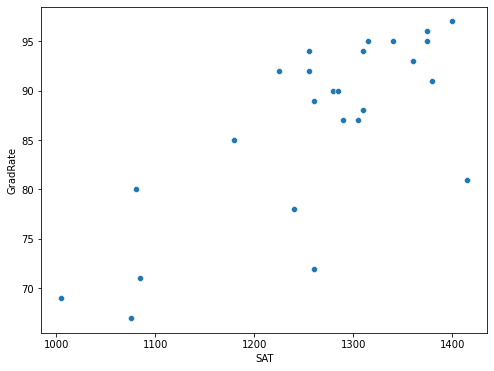

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(data= df, x= "SAT", y= "GradRate")
plt.show()

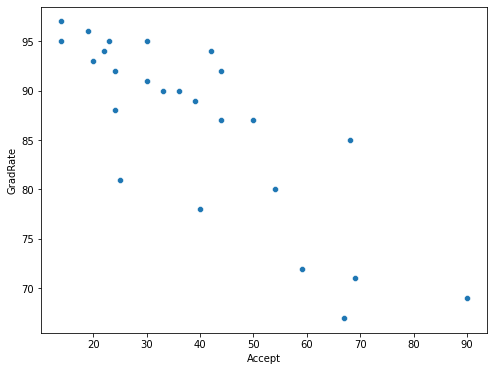

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(data= df, x= "Accept", y= "GradRate")
plt.show()

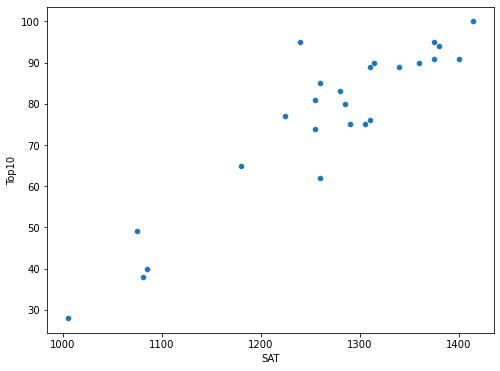

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(data= df, x= "SAT", y= "Top10")
plt.show()

### Scalling:

In [15]:
mn = MinMaxScaler()

In [16]:
temp = mn.fit_transform(df)
df = pd.DataFrame(temp, columns= df.columns)
df.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667


### Finding Optimal Number of Clusters:

In [17]:
sil_score= []

for k in range(2,11):
    
    hrc = AgglomerativeClustering(n_clusters= k, linkage= "average")
    
    clusters= hrc.fit_predict(df)
    
    sil_score.append(silhouette_score(df, clusters))

In [18]:
sil_score

[0.5521594686991348,
 0.382774854565949,
 0.3823617098115072,
 0.34502758351018875,
 0.3024855810892993,
 0.27656511878333395,
 0.2377034751882271,
 0.23996672027224095,
 0.2439789130855545]

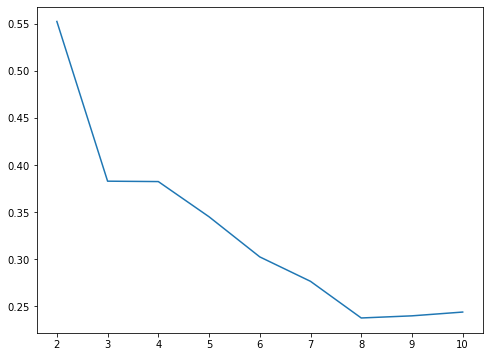

In [20]:
plt.figure(figsize=(8,6))
plt.plot(range(2,11), sil_score)
plt.show()

In [21]:
# 2 Seems like Optimal Here.

In [22]:
hrc_model = AgglomerativeClustering(n_clusters= 2, affinity= "euclidean", linkage= "average")

In [23]:
clusters = hrc_model.fit_predict(df)

In [24]:
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [25]:
df["Cluster"] = clusters

In [26]:
df.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000,0
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667,0
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667,0
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000,0
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667,0


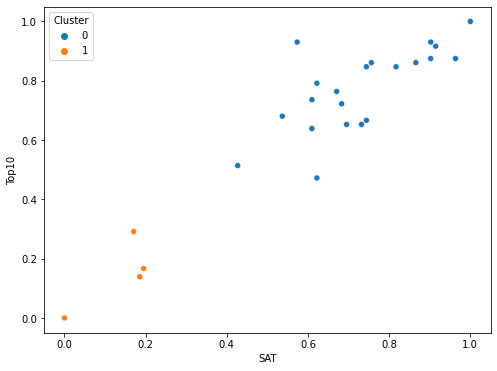

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(data= df, x= "SAT", y= "Top10", hue= "Cluster")
plt.show()

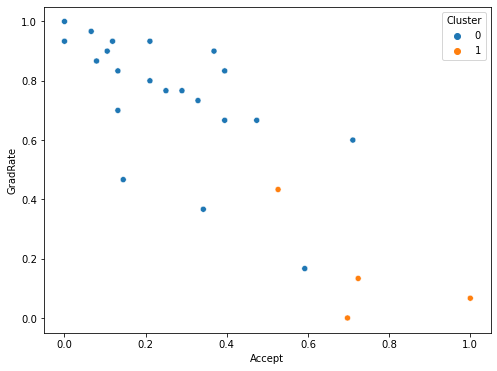

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(data= df, x= "Accept", y= "GradRate", hue= "Cluster")
plt.show()

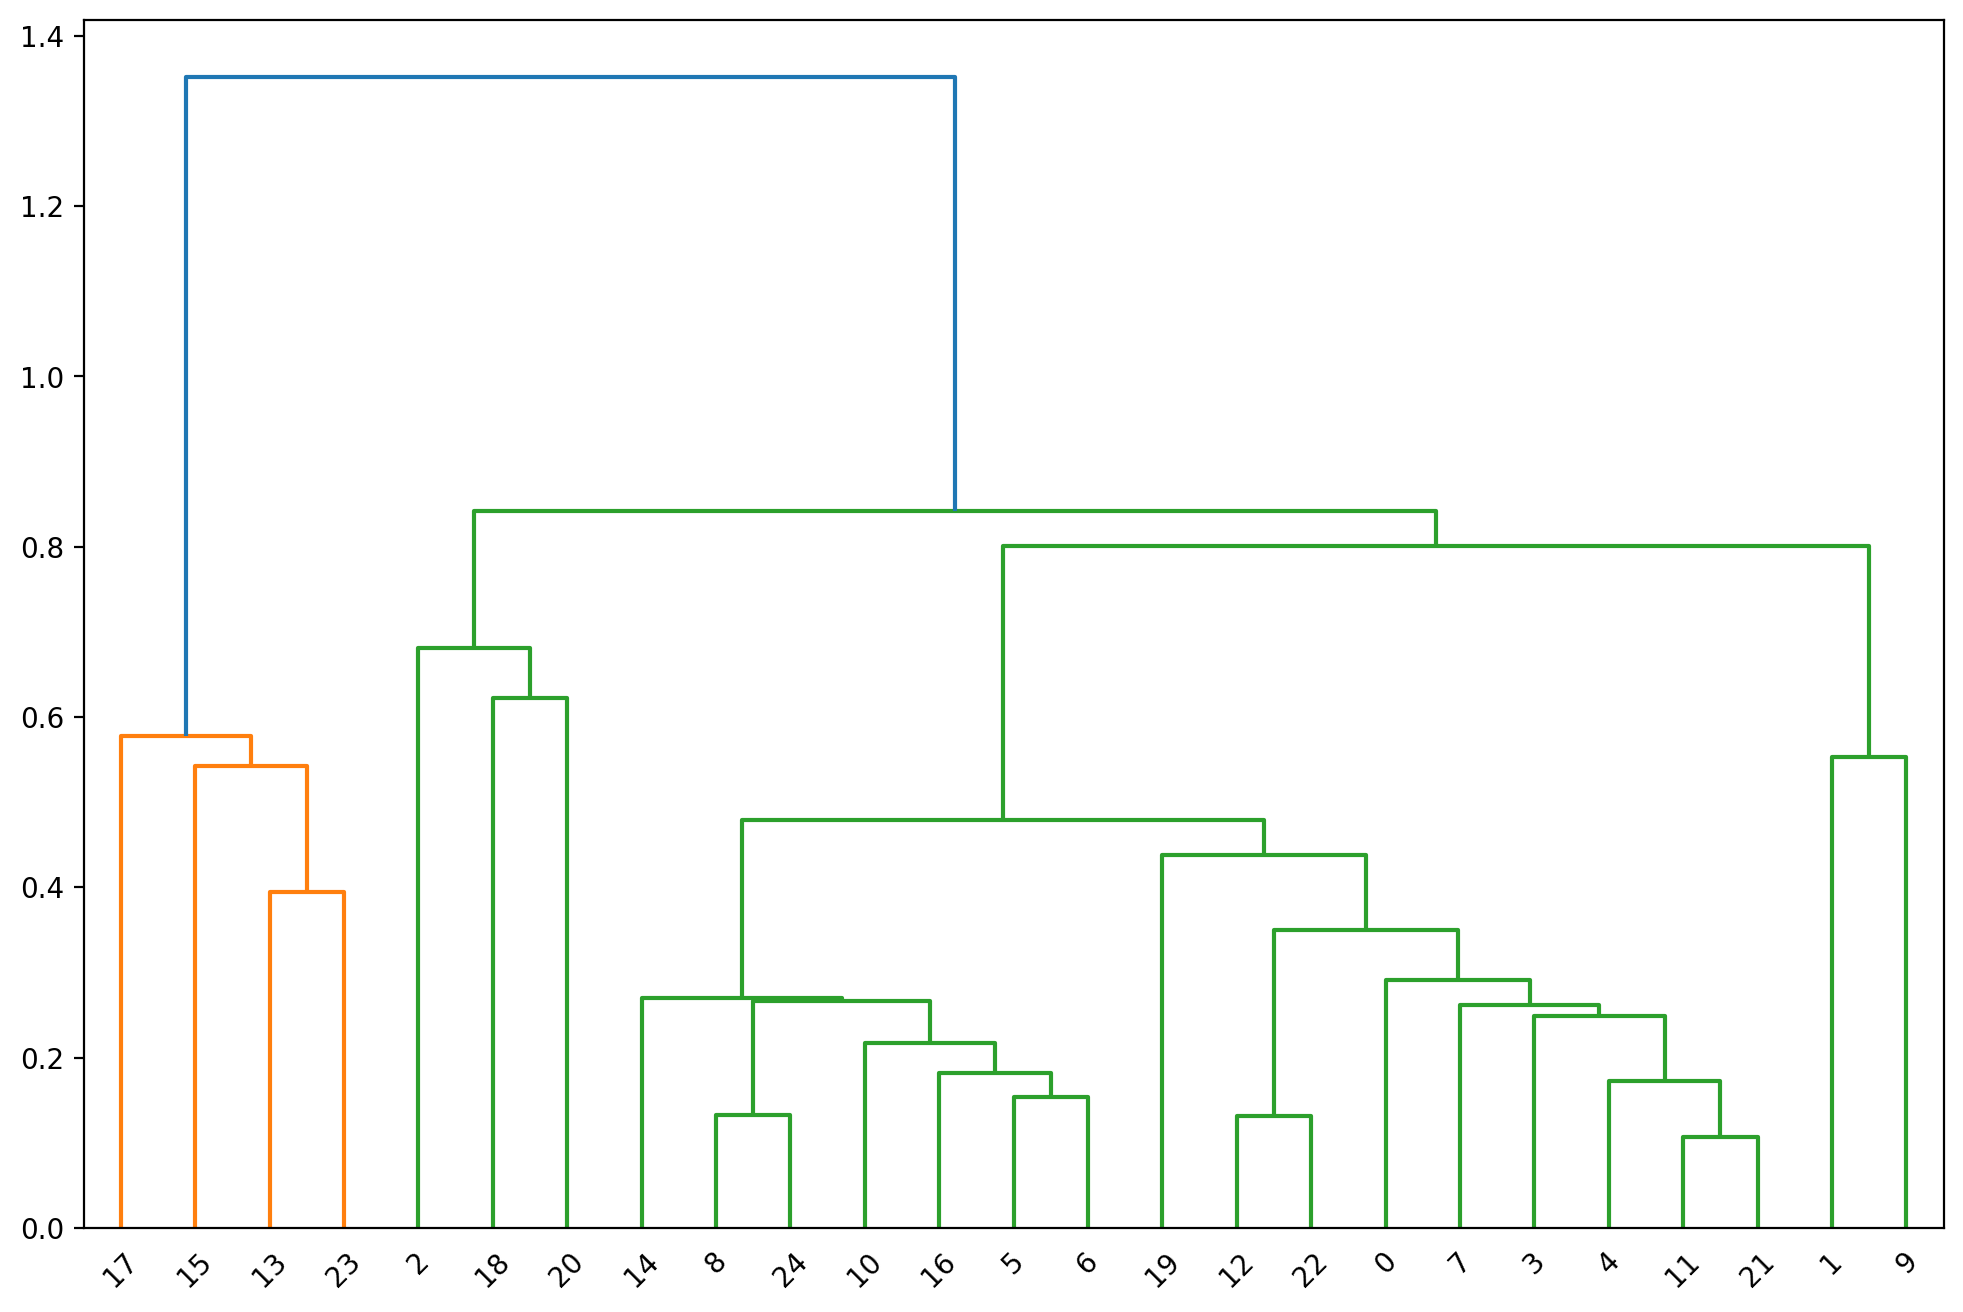

In [29]:
plt.figure(figsize= (12,8), dpi= 200)
dendrogram = sch.dendrogram(sch.linkage(df.drop("Cluster", axis= 1), method= "average"))
plt.show()